<a href="https://colab.research.google.com/github/heidilyu/Advanced-Calculus-/blob/main/Lab_31.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 3.1

Goals:

* Use `sympy` for symbolic algebra computations.
* Convert symbolic expressions to fuctions so they can be graphed.
* Write a function to produce Taylor Polynomials



Import the following libraries.


In [19]:
import numpy as np
import sympy
import matplotlib.pyplot as plt

Run this code cell to define the following `sympy` expressions.  It also defines `x` to be a `sympy` symbol.

In [20]:
#define a symbolic variable x.
x=sympy.Symbol('x')

expr1 = sympy.cos(x**3-2*x)
expr2 = sympy.sin(x**3+2*x)
expr3 = sympy.sin(2*x**2)+sympy.cos(x)
expr4 = (x**3-x)*sympy.cos(x)
expr5 = x*sympy.sin(x**3+x)

Pick a different expression than each of your groupmates.  For the rest of this lab, it is referred to as *your function*.



---
Hao chose expr5


## Q1

Copy/paste your `taylorpolynomial()` function from the prelab.  Then use it to print the degree 10 Taylor polynomial of your function, centered at 0.

In [21]:
expr = x*sympy.sin(x**3+x)

# define symbol x
x = sympy.Symbol('x')

# define the taylor polynomial function
def taylorpoly(f, a, n):
    poly = 0
    for k in range(n + 1):
        der = sympy.diff(f, x, k)
        derval = der.subs(x, a)
        term = (derval / sympy.factorial(k)) * (x - a)**k
        poly += term
    return poly

# test the function
f = x*sympy.sin(x**3+x)

taylor = taylorpoly(f, 0, 10)

print(taylor)

-30743*x**10/362880 - 2311*x**8/5040 - 59*x**6/120 + 5*x**4/6 + x**2


## Q2

Using `sympy.lambdify()`, convert your function and its Taylor polynomial to functions that can be applied to `numpy` arrays.  Then plot both of them together on an axis.

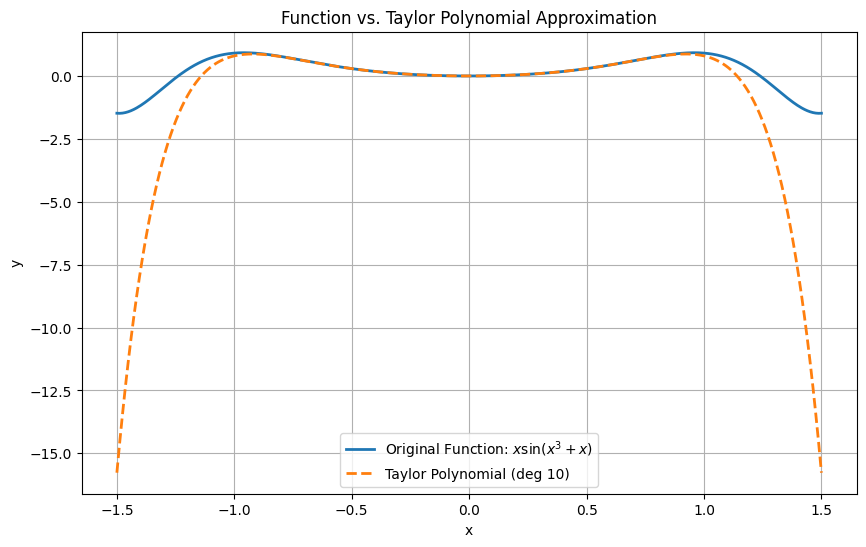

In [22]:
# define symbol x
x = sympy.Symbol('x')

# define the taylor polynomial function
def taylorpoly(f, a, n):
    poly = 0
    for k in range(n + 1):
        der = sympy.diff(f, x, k)
        derval = der.subs(x, a)
        term = (derval / sympy.factorial(k)) * (x - a)**k
        poly += term
    return poly

# convert my functions
f = x*sympy.sin(x**3+x)

f_numpy = sympy.lambdify(x, f, 'numpy')
taylor_numpy = sympy.lambdify(x, taylorpoly(f, 0, 10), 'numpy')

# define plot
x_vals = np.linspace(-1.5, 1.5, 500)
y_vals = f_numpy(x_vals)
taylor_vals = taylor_numpy(x_vals)

# plot functions
plt.figure(figsize=(10, 6))
plt.plot(x_vals, y_vals, label='Original Function: $x \sin(x^3 + x)$', linewidth=2)
plt.plot(x_vals, taylor_vals, '--', label='Taylor Polynomial (degree 10)', linewidth=2)
plt.grid(True)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Function vs. Taylor Polynomial Approximation")
plt.legend()
plt.show()



## Q3

Recall that
* An *even* function is symmetric across the $y$-axis. It satisfies $f(x)=f(-x)$ for all $x$.
* An *odd* function is symmetric across the origin.  It satisfies $f(x)=-f(-x)$ for all $x$.

Some of your group members have even functions and some have odd functions. In a text cell explain how this is reflected in their Taylor polyomials centered at 0. You should specifically reference evidence from their functions.  Give a mathematical explanation for why this pattern should generalize to any even or odd function.




---

Answer:


1.   Please see the code below showing the figure of all the original functions in the domain of [-2, 2]. It shows that f2 and f4 are odd functions. f1, f3, f5 are even functions.

2.   Comparing the results with group members, I find that


*   An even function is symmetric across the  𝑦 -axis. Its Taylor Polynomial is symmetric across the 𝑦 -axis as well and only contains even powers of x, for instance 1,3,and 5.


*   An odd function is symmetric across the origin. Its Taylor polynomial is symmetric across the origin as well and only contains odd powers of x, for instance, 2 and 4. I use f2 as an example to show this.

* You can find a table of all results in the second figure below.


3. Mathmetical explanation of this pattern:

    As the function of taylor polynamial centered at 0 is a composition of 0th to nth derivatives:
$$ P_n(x) = \sum_{k=0}^{n} \frac{f^{(k)}(0)}{k!} x^k $$


*   When the original function is an even function, it is symmetric across the 𝑦 -axis. Thus, (0,0) is a local minimum or a local maximum. Therefore, $f' = 0$ and $f'' > 0$ or $f''< 0$ . Thus, the Taylor Polynomial kept all the even powers of x and all the odd powers are equal to 0. In the end, the Taylor Polynomial is an even function as well.
*   When the original function is an odd function, is is symmetric across the original. Therefore, (0,0) has to be a saddle point. Just like the graph for f2 below. In this way, $f' \neq 0 $ and $f'' = 0$. Therefore, the Taylor Polynomial kept all the odd powers of x. In the end, the Taylor Polynomial is an odd function as well.








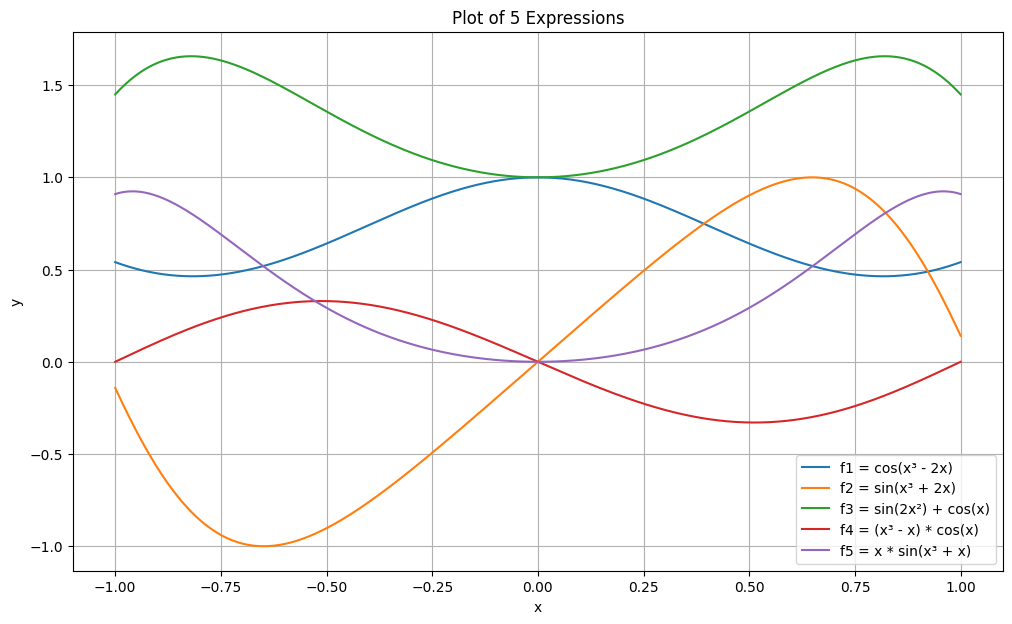

In [23]:
# Figure 1

# 5 functions
expr1 = sympy.cos(x**3-2*x)
expr2 = sympy.sin(x**3+2*x)
expr3 = sympy.sin(2*x**2)+sympy.cos(x)
expr4 = (x**3-x)*sympy.cos(x)
expr5 = x*sympy.sin(x**3+x)

# plot all functions
f1 = sympy.lambdify(x, expr1, 'numpy')
f2 = sympy.lambdify(x, expr2, 'numpy')
f3 = sympy.lambdify(x, expr3, 'numpy')
f4 = sympy.lambdify(x, expr4, 'numpy')
f5 = sympy.lambdify(x, expr5, 'numpy')

# define plot
x_vals = np.linspace(-1, 1, 500)
y1 = f1(x_vals)
y2 = f2(x_vals)
y3 = f3(x_vals)
y4 = f4(x_vals)
y5 = f5(x_vals)

# plot
plt.figure(figsize=(12, 7))
plt.plot(x_vals, y1, label='f1 = cos(x³ - 2x)')
plt.plot(x_vals, y2, label='f2 = sin(x³ + 2x)')
plt.plot(x_vals, y3, label='f3 = sin(2x²) + cos(x)')
plt.plot(x_vals, y4, label='f4 = (x³ - x) * cos(x)')
plt.plot(x_vals, y5, label='f5 = x * sin(x³ + x)')

plt.grid(True)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Plot of 5 Expressions")
plt.legend()
plt.show()


Here is a table of all the functions and their degree 10 taylor polynomial.

Figure 2

|   |Function &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;| f - Figure | Taylor Polynomial &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;| Taylor Figure |
|---|---------------------|------|---|---|
| 1 | $cos(x^3-2x)$       | even | $ \frac{-1402x^{10}}{2025} + \frac{401x^8}{315} - \frac{173x^6}{90} + \frac{8x^4}{3} - 2x^2 + 1$|  even |
| 2 | $sin(x^3+2x)$       | odd  | $\frac{2339}{5670} x^9 - \frac{113}{315} x^7 - \frac{26}{15} x^5 - \frac{1}{3} x^3 + 2x$ | odd|
| 3 | $sin(2x^2)+ cos(x)$ | even | $\frac{967679}{3628800}x^{10} + \frac{1}{40320}x^8 - \frac{961}{720}x^6 + \frac{1}{24}x^4 + \frac{3}{2}x^2 + 1$ | even  |
| 4 | $(x^3-x)* cos(x)$   | odd  | $-\frac{19}{13440}x^9 + \frac{31}{720}x^7 - \frac{13}{24}x^5 + \frac{3}{2}x^3 - x$ | odd  |
| 5 | $ x sin(x^3+x)$     | even | $-\frac{30743}{362880}x^{10} - \frac{2311}{5040}x^8 - \frac{59}{120}x^6 + \frac{5}{6}x^4 + x^2 $ |  even |


As my expression is an even function, I'm showing expression 2 as an example for an odd function.

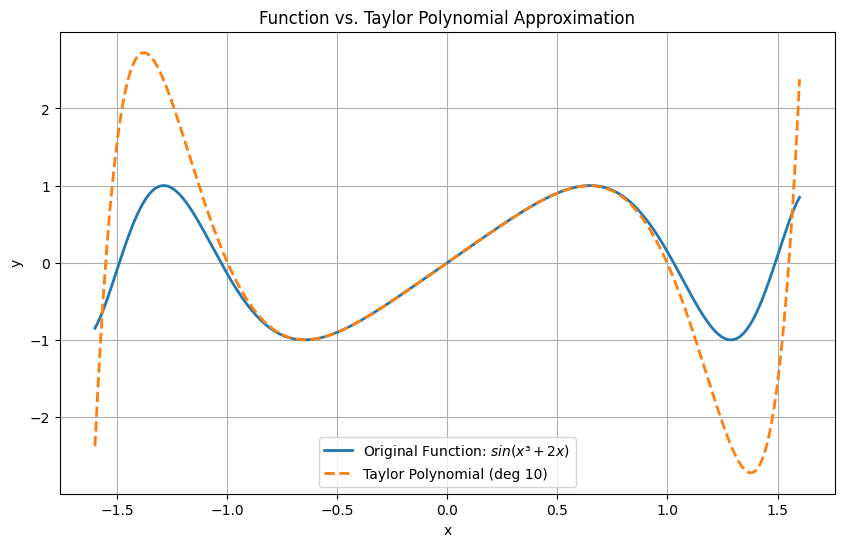

In [24]:
# Figure 3


# define symbol x
x = sympy.Symbol('x')

# define the taylor polynomial function
def taylorpoly(f, a, n):
    poly = 0
    for k in range(n + 1):
        der = sympy.diff(f, x, k)
        derval = der.subs(x, a)
        term = (derval / sympy.factorial(k)) * (x - a)**k
        poly += term
    return poly

# convert my functions
f = sympy.sin(x**3+2*x)

f_numpy = sympy.lambdify(x, f, 'numpy')
taylor_numpy = sympy.lambdify(x, taylorpoly(f, 0, 10), 'numpy')

# define plot
x_vals = np.linspace(-1.6, 1.6, 500)
y_vals = f_numpy(x_vals)
taylor_vals = taylor_numpy(x_vals)

# plot functions
plt.figure(figsize=(10, 6))
plt.plot(x_vals, y_vals, label='Original Function: $sin(x³ + 2x)$', linewidth=2)
plt.plot(x_vals, taylor_vals, '--', label='Taylor Polynomial (degree 10)', linewidth=2)
plt.grid(True)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Function vs. Taylor Polynomial Approximation")
plt.legend()
plt.show()

